# Learning Curve Homework

In this problem I had to train a linear regression and draw a learning curve

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24
from skimage import transform
%matplotlib inline

loading and preparing data. Result is to be predicted using formula $y=wx+b$

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

from torch.autograd import Variable
w = torch.zeros(boston.data.shape[1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data/np.mean(boston.data, axis=0), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [3]:
iters = 500
losses = np.zeros(iters)
for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

In [4]:
losses[iters-1]

26.658235549926758

In [5]:
w = torch.zeros(boston.data.shape[1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)
noise = np.random.normal(loc=0.0, scale=1.01, size=boston.data.shape)
x = torch.tensor(boston.data/np.mean(boston.data, axis=0)+noise, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [6]:

losses_noisy = np.zeros(iters)
for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses_noisy[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

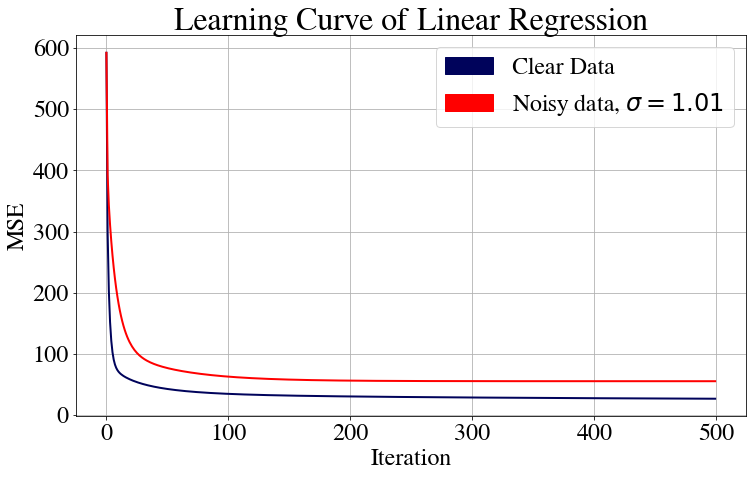

In [13]:
import matplotlib.patches as mpatches
x_range = range(iters)
plt.figure(figsize=(12, 7))
line_clear = plt.plot(x_range, losses, color='#00035b')
line_noisy = plt.plot(x_range, losses_noisy, color='red')
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Learning Curve of Linear Regression")
red_patch = mpatches.Patch(color='#00035b', label='Clear Data')
blue_patch = mpatches.Patch(color='red', label='Noisy data, $\sigma = 1.01$')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('Plot2.png')

In [8]:
losses_noisy[iters-1]

55.28581237792969